In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

pd.set_option('display.float_format', lambda x: '%.4f' % x)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('../data/data asli.csv', parse_dates=['TIMESTAMP'])
df.dropna(inplace=True)
df.head()

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
0,2020-08-01 06:07:00,-19,1,60.1580,24.9460,60.1600,24.9460,29,10,0.0000,15.0000,3.5364,0.0000
1,2020-08-01 06:17:00,-7,8,60.1630,24.9270,60.1530,24.9100,39,32,0.0000,15.0000,3.5364,0.0000
2,2020-08-01 06:54:00,-17,4,60.1610,24.9370,60.1620,24.9390,23,6,0.0000,15.0000,3.5364,0.0000
3,2020-08-01 07:09:00,-2,3,60.1850,24.9540,60.1900,24.9110,28,26,0.0000,16.7000,3.5227,0.0000
4,2020-08-01 07:10:00,-1,2,60.1820,24.9550,60.1780,24.9490,27,26,0.0000,16.7000,3.5227,0.0000


In [4]:
fitur = ['CLOUD_COVERAGE', 'TEMPERATURE', 'WIND_SPEED', 'PRECIPITATION']
X = df[fitur]

n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None)

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

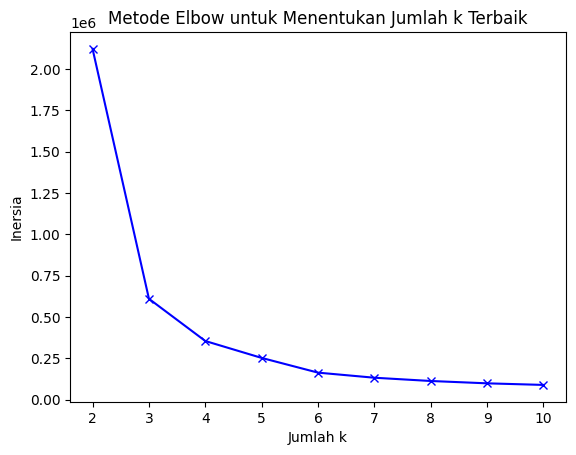

In [5]:
plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

Jumlah Cluster berdasarkan metode Ellbow = 4

In [6]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.8063780934711393
CH Index Score = 74773.01330803958

Jumlah Cluster = 3
Silhouette Score = 0.8102612411111799
CH Index Score = 152935.25299216426

Jumlah Cluster = 4
Silhouette Score = 0.8103606236959171
CH Index Score = 179939.09743378445

Jumlah Cluster = 5
Silhouette Score = 0.5404669052228815
CH Index Score = 191681.96065647053

Jumlah Cluster = 6
Silhouette Score = 0.546161442055498
CH Index Score = 239243.3343018831

Jumlah Cluster = 7
Silhouette Score = 0.4774304545546993
CH Index Score = 246555.7261415169

Jumlah Cluster = 8
Silhouette Score = 0.44946157427408384
CH Index Score = 249036.5155882326

Jumlah Cluster = 9
Silhouette Score = 0.4725085333896466
CH Index Score = 249698.18116365207

Jumlah Cluster = 10
Silhouette Score = 0.47484309683936576
CH Index Score = 246270.17853236047


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 4
Nilai Silhoutte Score = 0.8103606236959171

Jumlah Cluster CH Index =

# Pemodelan

In [7]:
kmeans = KMeans(n_clusters=3, max_iter=500, n_init=50, random_state=42)
member = kmeans.fit_predict(X)

df['CUACA'] = kmeans.labels_
df['CUACA'].value_counts()

0    13760
2     3025
1     1644
Name: CUACA, dtype: int64

d:\python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


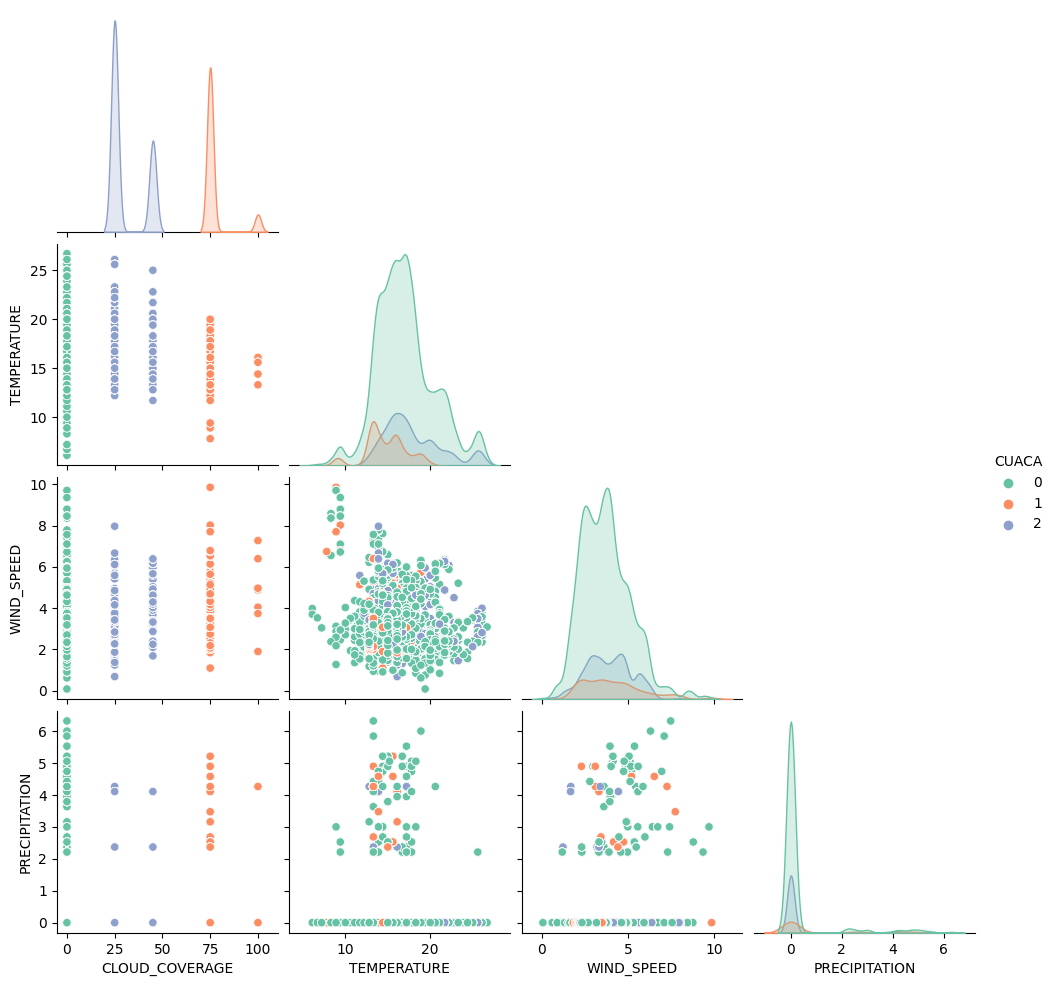

In [8]:
kolom = fitur + ['CUACA']
sns.pairplot(df[kolom], corner=True, hue='CUACA', palette='Set2')

In [9]:
group_1 = df.groupby('CUACA').mean()[['CLOUD_COVERAGE', 'TEMPERATURE', 'WIND_SPEED', 'PRECIPITATION']]
group_2 = df.groupby('CUACA').size().reset_index(name="Jumlah Data")
pd.merge(group_2, group_1, on="CUACA")

,CUACA,Jumlah Data,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
0,0,13760,0.0000,17.0248,3.7253,0.3367
1,1,1644,77.3875,14.7692,4.1666,0.7070
2,2,3025,31.0298,17.9386,3.8856,0.1420


In [11]:
mapping = {
    0: 'Sejuk',
    1: 'Cerah',
    2: 'Berawan'
}

df['CUACA'] = df['CUACA'].map(mapping)
df.to_csv('../data/data_cluster.csv', index=False)